<a href="https://colab.research.google.com/github/kajastalder/data-science-fundamentals/blob/main/Coding_Task_2_saving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaja Stalder, 19-108-315

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-2-c7103857a794>:46: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(cropped_image,selem=skm.disk(35))


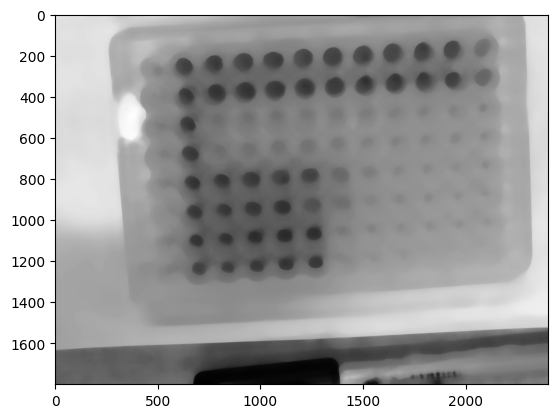

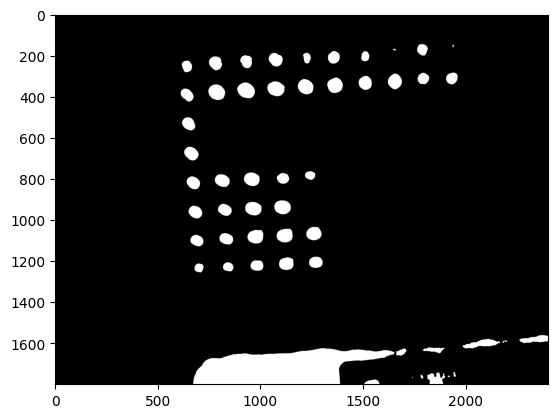

error: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm

from google.colab import drive
drive.mount('/content/drive')

!pip install pillow_heif 

# subtask 1: 
# Write a function which retrieves the filenames of the images, 
# contains a loop converting them to png images and saves them.
from PIL import Image
import pillow_heif


url_pre  = '/content/drive/MyDrive/DSF/coding-task-2/'

def heic_images_in_png_images():
  for i in range(5379,5394):
    url_name = 'IMG_' + str(i) + '.HEIC'
    heif_file = pillow_heif.read_heif(url_pre+url_name)
    image = Image.frombytes(heif_file.mode, heif_file.size, bytes(heif_file.data),'raw')
    url_name = url_name.split('.')[0]+'.png'
    image.save(url_pre+url_name, format="png")

# to prevent that conversion loop is executed if png images exist already
try:
  image = io.imread(url_pre+'IMG_5379.png')
except:
  heic_images_in_png_images()



# subtask 2:
# With some filtering and sthresholding, write a function which converts the 
# colored bins into nice white segments on a black background for one image. 

#for i in range(5379,5394):
url_name = url_pre + 'IMG_' + str(5382) + '.png'
imageRGB = io.imread(url_name)
image = imageRGB[:,:,2]
cropped_image = image[1900:3700,300:2700]
image_mean = skf.median(cropped_image,selem=skm.disk(35))
plt.imshow(image_mean, cmap='gray')
plt.show()
threshold_manual = 65
image_threshold = image_mean<threshold_manual
plt.imshow(image_threshold, cmap ='gray')
plt.show()





# subtask 3:
# Write an algorithm which counts the number of bins. 
# First approach could be a "sliding window" algorithm, i.e a loop sliding over 
# the image and counting regions with substantial white content. There may also 
# be nice segmentation tools out "there" already. You may google.


import cv2

# Convert to HSV color space
hsv_image = cv2.cvtColor(image_threshold,cv2.COLOR_BGR2HSV )
plt.imshow(hsv_image, cmap ='gray')
plt.show()

